In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1

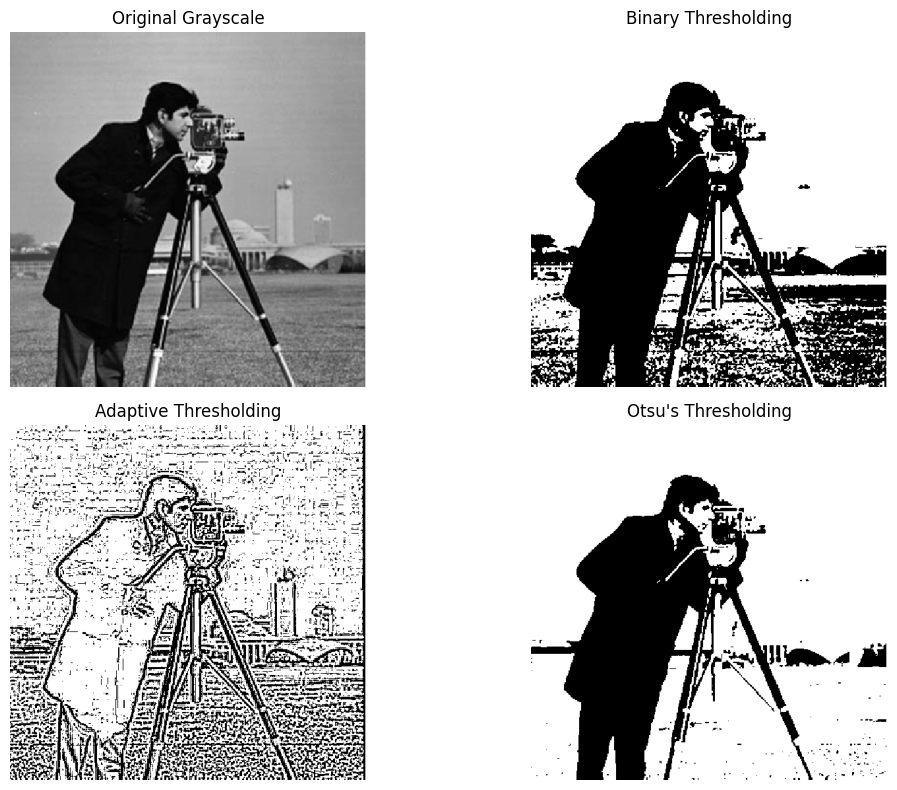

In [46]:
def apply_thresholding(image_path):

    # I am thresholding the image using different methods (cv2 inbuilt functions)

    gray_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
    adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    _, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return gray_img, binary_thresh, adaptive_thresh, otsu_thresh

input_image_path = './images/greyscale_camera.png'
gray_img, binary_thresh, adaptive_thresh, otsu_thresh = apply_thresholding(input_image_path)

plt.figure(figsize=(12, 8))
images = [gray_img, binary_thresh, adaptive_thresh, otsu_thresh]
titles = ['Original Grayscale', 'Binary Thresholding', 'Adaptive Thresholding', "Otsu's Thresholding"]

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 2, i + 1)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Observations

- Otsus algorithm to find the threshold value for binarization works best for thresholding this image.

- The image is a simple black and white image with clear boundaries between the objects and the background and close to no noise. The objects are also well separated from each other.

- A building in the background of the image has lost its shape, but the thresholding on the focus object is clear and well defined.

- In contrast, adaptive thresholding has a lot of noise, even though the object boundary is well defined.

- Normal thresholding, set to 127, has slightly irregular boundaries and some noise.

# 2

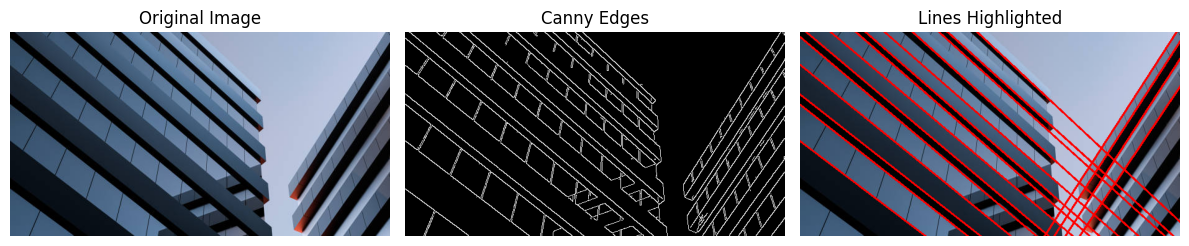

In [47]:
def detect_and_highlight_lines(image_path, threshold=180):
    original_img = cv2.imread(image_path)

    gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)

    # Below code is to draw the lines on the original image
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * a)

            cv2.line(original_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return original_img, edges

input_image_path = './images/building.jpg'
highlighted_image, edges = detect_and_highlight_lines(input_image_path)

if highlighted_image is not None:
    original_img = cv2.imread(input_image_path)

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Canny Edges')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Lines Highlighted')
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


### Threshold values effect

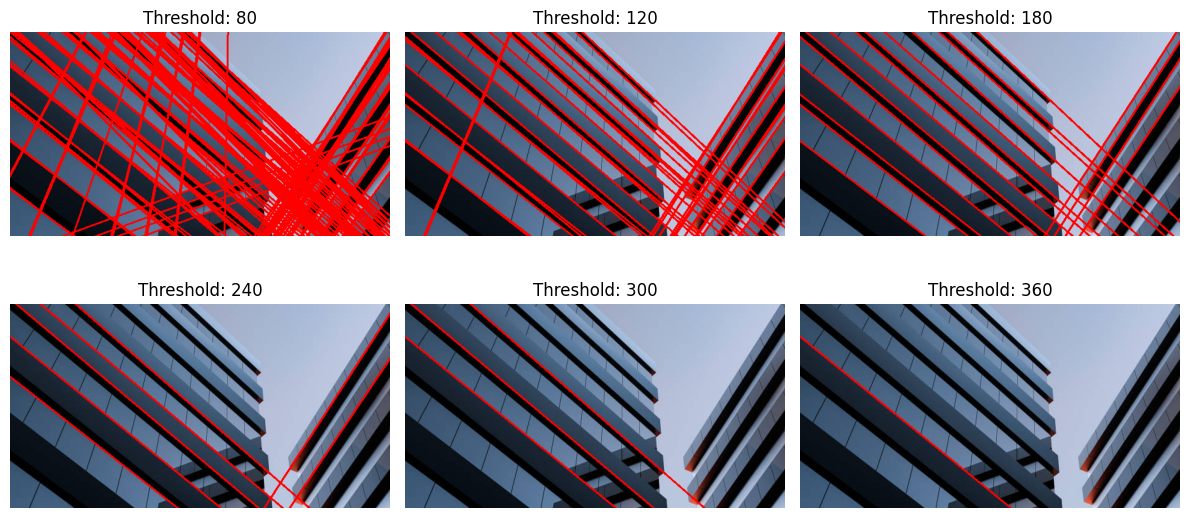

In [48]:
threshold_values = [80, 120, 180, 240, 300, 360]

plt.figure(figsize=(12, 6))
for i, threshold in enumerate(threshold_values):
    highlighted_image, _ = detect_and_highlight_lines(input_image_path, threshold)

    plt.subplot(2, 3, i+1)
    plt.title(f'Threshold: {threshold}')
    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

### Observations

Threshold values here, signify the minimum number of points n the Hough accumulator array required to consider it a valid line. \
For lower threshold values, more lines are detected, including weak or insignificant ones. This reults in cluttered output. \
On increasing threshold values, the number of lines detected decreases and false positives reduces. Thus when threshold = 360, only 1 line is detected. 

# 3

In [49]:
def display_images_grid(images, grid_size, titles=None, figsize=(12, 8)):

    n, m = grid_size

    plt.figure(figsize=figsize)
    
    for i, img in enumerate(images):
        plt.subplot(n, m, i + 1)
        if titles and i < len(titles):
            plt.title(titles[i])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [50]:
def detect_and_highlight_circles(original_img, dp=1.2, min_dist=50, param1=100, param2=30, min_radius=0, max_radius=100):

    # Below code converts the image to grayscale and applies Gaussian Blur then I am using cv2 inbuilt HoughCircles function to detect circles in the image.

    gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT, 
        dp=dp, 
        minDist=min_dist,
        param1=param1, 
        param2=param2, 
        minRadius=min_radius, 
        maxRadius=max_radius
    )

    output_img = original_img.copy()
    # below code is to draw the circles on the original image
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            x, y, radius = circle
            cv2.circle(output_img, (x, y), radius, (255, 255, 255), 2)
            cv2.circle(output_img, (x, y), 1, (0, 0, 255), 2)

    return output_img, circles

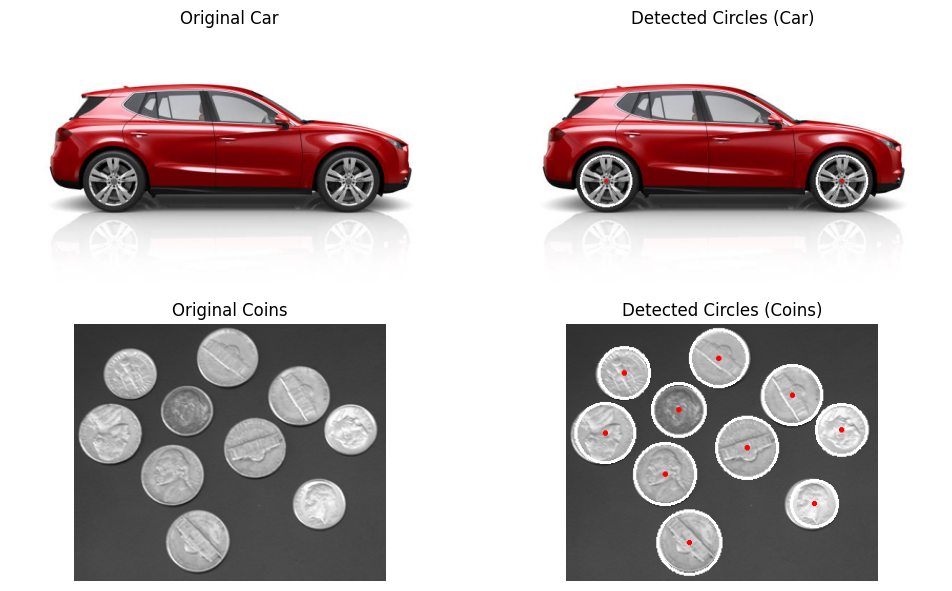

In [51]:
car_img = cv2.imread('./images/car.jpg')
coins_img = cv2.imread('./images/coins.png')


# Below parameters have been set after trial and error
detected_image_car, detected_circles_car = detect_and_highlight_circles(car_img,dp=2,param2=100,max_radius=60)
detected_image, detected_circles = detect_and_highlight_circles(coins_img)

car_img = cv2.imread('./images/car.jpg')
coins_img = cv2.imread('./images/coins.png')

images = [car_img, detected_image_car, coins_img, detected_image]
titles = ['Original Car', 'Detected Circles (Car)', 'Original Coins', 'Detected Circles (Coins)']
display_images_grid(images, grid_size=(2, 2), titles=titles, figsize=(10, 6))

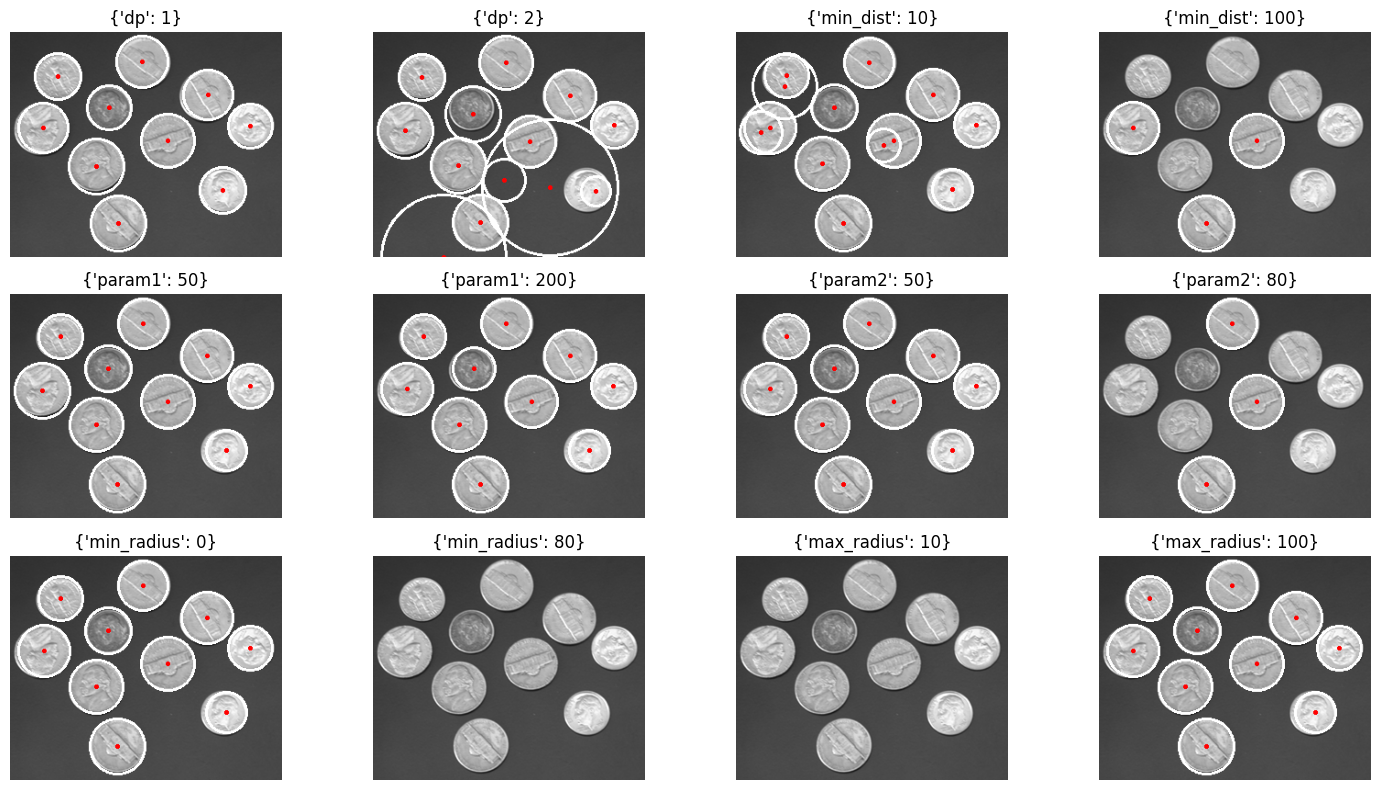

In [52]:
parameter_sets = [
    {'dp': 1},
    {'dp': 2},
    {'min_dist': 10},
    {'min_dist': 100},
    {'param1': 50},
    {'param1': 200},
    {'param2': 50},
    {'param2': 80},
    {'min_radius': 0},
    {'min_radius': 80},
    {'max_radius': 10},
    {'max_radius': 100}
]

plt.figure(figsize=(15, 8))

for i, params in enumerate(parameter_sets):
    detected_image, detected_circles = detect_and_highlight_circles(coins_img, **params)

    plt.subplot(3, 4, i + 1)
    plt.title(params)
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

## Observations
- Lower values (dp=1) produce more accurate results as the accumulator resolution matches the image resolution. \
Higher values (dp=2) reduce the resolution of the accumulator, which results in false positives.

- Lower values of minDist (10) results in many false circles being detected. \
Very high values of minDist (100) result in fewer circles being detected.

- Lower values of accumulator threshold (50) results in circles being detected accurately. \
Higher values of accumulator threshold (100) result in fewer circles meeting the threshold being detected. \
I noticed that the circles detected are the largest circles in the image. This is because they have more points in the accumulator array.

- High values of minRadius (80) result no circles being detected.

- Lower values of maxRadius (10) result is no circles being detected.

## Final Parameters

Keeping above observations in mind, I have improved the image by setting the parameters so that the following:
- dp=1.2
- minDist=50
- param1=100
- param2=30
- minRadius=0
- maxRadius=100



# 4

In [53]:
def detect_and_mark_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):

    # Below code reads the image and converts it to grayscale. Then I am using cv2 inbuilt cornerHarris function to detect corners in the image.
    # I am then dilating the corners so that they are more visible in the image.
    
    original_img = cv2.imread(image_path)
    gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    corners = cv2.cornerHarris(gray, block_size, ksize, k)
    corners = cv2.dilate(corners, None)

    marked_img = original_img.copy()
    marked_img[corners > threshold * corners.max()] = [0, 0, 255]

    return original_img, marked_img

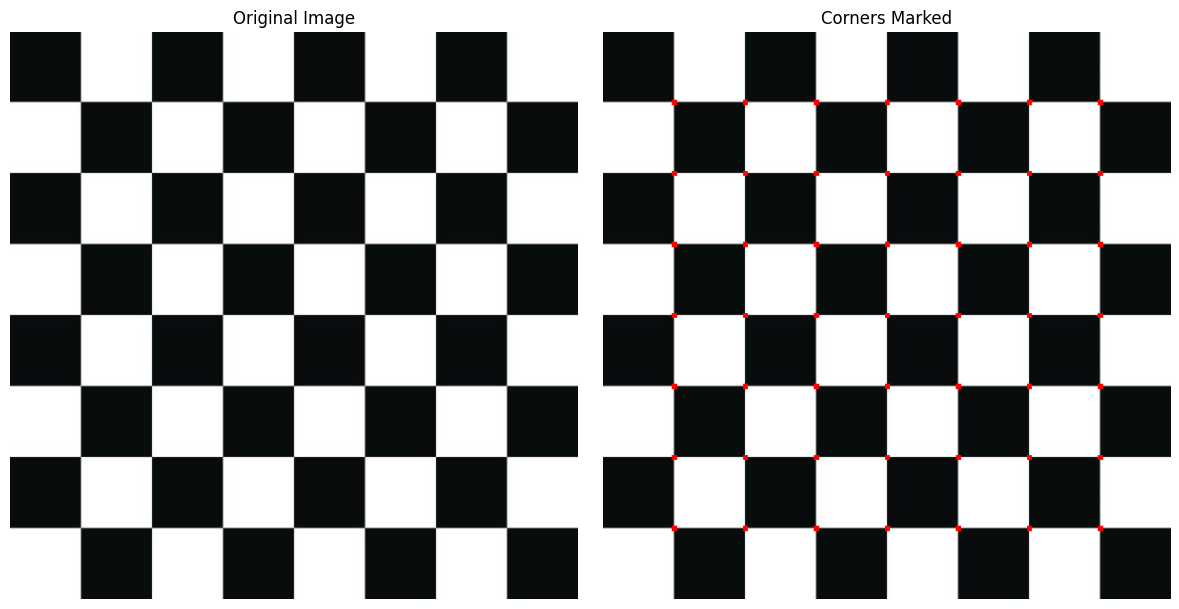

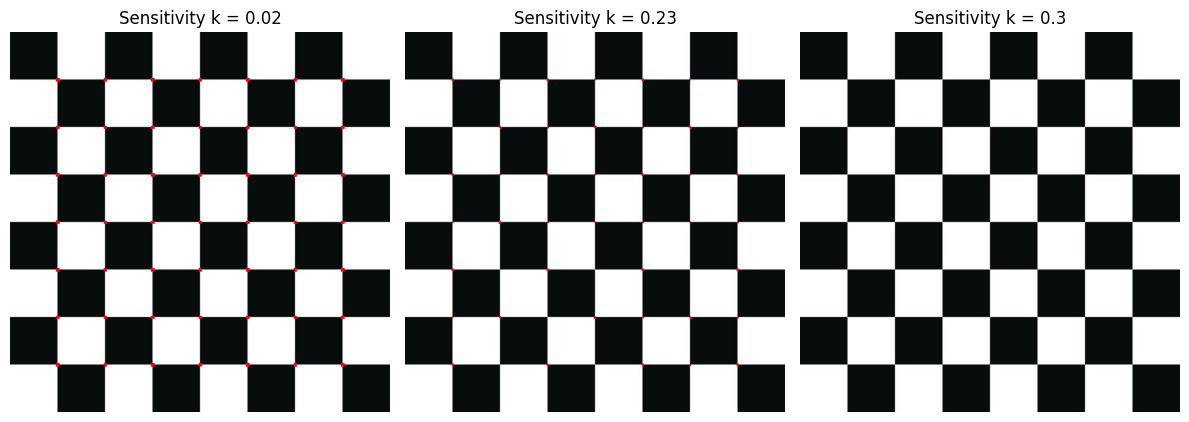

In [54]:
input_image_path = './images/chessboard.jpg'
original_img, marked_img = detect_and_mark_corners(input_image_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Corners Marked')
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

sensitivity_values = [0.02, 0.23, 0.3]

plt.figure(figsize=(12, 6))
for i, k in enumerate(sensitivity_values):
    _, marked_img = detect_and_mark_corners(input_image_path, k=k)
    plt.subplot(1, len(sensitivity_values), i + 1)
    plt.title(f'Sensitivity k = {k}')
    plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()

## Observations

- For lower values of k, the sensitivity of the edge detection increases and all corners are detected. \
- For slightly higher values of k, the sensitivity decreases and some corners are not detected. \
- For even higher values of k, the sensitivity decreases and no corners are detected.

# 5

The Hough Transform behaves differently when detecting lines than circles due to its parameter space and computational demands.

The transform uses a 2D parameter space for lines: rho (distance from the origin) and theta (angle). Edge points vote in this space, which makes line detection relatively simple and computationally efficient. This is particularly effective for images with well-defined linear features, such as roads or building edges.

For circles, the parameter space expands to 3D: x, y (center coordinates), and r (radius). The approach increases the computational complexity because each edge point votes for multiple possible circles with different radii. This is well-suited for detecting circular objects like coins or wheels.

Also, circle detection involves more parameters to be tuned, including accumulator thresholds and radius ranges, which affects sensitivity and accuracy.

The 3D space for circles thus, increases memory usage and processing time as opposed to lines.